# **Introduction aux réseaux de neurones convolutifs**

In [1]:
# importation des données

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Nos images d'entraînement sont stockées dans un tableau :

- de forme (60000, 28, 28)
- de type uint8
- avec des valeurs dans l'intervalle [0, 255]

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Prétraitement des données

nous allons transformer nos données en un tableau float32 de forme (60000, 28, 28, 1) avec des valeurs comprises entre 0 et 1.

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [6]:
# Modele

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [8]:
# entrainement

model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data = (test_images, test_labels),
                    batch_size=64)

Epoch 1/2
938/938 [==============================] - 65s 68ms/step - loss: 0.1514 - accuracy: 0.9531 - val_loss: 0.0606 - val_accuracy: 0.9805
Epoch 2/2
938/938 [==============================] - 76s 81ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0322 - val_accuracy: 0.9895


In [9]:
# evaluation

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.3f}")

313/313 - 3s - loss: 0.0322 - accuracy: 0.9895 - 3s/epoch - 11ms/step
Test accuracy: 0.989


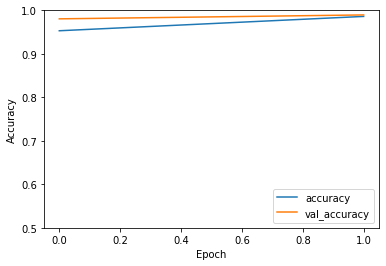

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');